In [1]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# Create a "Client" object
client = bigquery.Client.from_service_account_json(
        'pivotal-base-325013-fadc3e8bcaf3.json')

# Construct a reference to the "google_analytics_sample" dataset
dataset_ref = client.dataset("google_analytics_sample", project="bigquery-public-data")

# Construct a reference to the "ga_sessions_20170801" table
table_ref = dataset_ref.table("ga_sessions_20170801")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(table, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501583974,1501583974,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2248281639583218707,None,None,Organic Search,Not Socially Engaged
1,NaN,1,1501616585,1501616585,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8647436381089107732,None,None,Organic Search,Not Socially Engaged
2,NaN,1,1501583344,1501583344,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2055839700856389632,None,None,Organic Search,Not Socially Engaged
3,NaN,1,1501573386,1501573386,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut...",0750846065342433129,None,None,Direct,Not Socially Engaged
4,NaN,8,1501651467,1501651467,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu...",0573427169410921198,None,None,Organic Search,Not Socially Engaged


In [2]:
table.schema

[SchemaField('visitorId', 'INTEGER', 'NULLABLE', None, (), ()),
 SchemaField('visitNumber', 'INTEGER', 'NULLABLE', None, (), ()),
 SchemaField('visitId', 'INTEGER', 'NULLABLE', None, (), ()),
 SchemaField('visitStartTime', 'INTEGER', 'NULLABLE', None, (), ()),
 SchemaField('date', 'STRING', 'NULLABLE', None, (), ()),
 SchemaField('totals', 'RECORD', 'NULLABLE', None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('hits', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, (), ()), SchemaField('uniqueScreenviews', 'INTEGER', 'NULLABLE', N

In [3]:
#check for Null NaN
client.list_rows(table).to_dataframe().isnull().sum()

visitorId               2556
visitNumber                0
visitId                    0
visitStartTime             0
date                       0
totals                     0
trafficSource              0
device                     0
geoNetwork                 0
customDimensions           0
hits                       0
fullVisitorId              0
userId                  2556
clientId                2556
channelGrouping            0
socialEngagementType       0
dtype: int64

In [4]:
#check for Null - subfields
query = """
        SELECT 
        'totals' as _totals_ ,
            totals.*,
        'trafficSource' as _trafficSource_,
            trafficSource.*,
        'device' as _device_,
            device.*,
        'geoNetwork' as _geoNetwork_,
            geoNetwork.*
            
        
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
 
        """
# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe().isnull().sum()
result

_totals_                        0
visits                          0
hits                            0
pageviews                       0
timeOnSite                   1246
bounces                      1318
transactions                 2513
transactionRevenue           2513
newVisits                     684
screenviews                  2556
uniqueScreenviews            2556
timeOnScreen                 2556
totalTransactionRevenue      2513
sessionQualityDim               0
_trafficSource_                 0
referralPath                 1907
campaign                        0
source                          0
medium                          0
keyword                      2551
adContent                    2544
adwordsClickInfo                0
isTrueDirect                 1684
campaignCode                 2556
_device_                        0
browser                         0
browserVersion                  0
browserSize                     0
operatingSystem                 0
operatingSyste

In [5]:
query = """
        

select 
a.channelGrouping,
a.source,
a.Visits_count,
b.Visitor_with_revenue,
b.total_revenue,
b.total_revenue/b.Visitor_with_revenue as avg_revenue,
b.Visitor_with_revenue/a.Visits_count *100 as percent_Visitor_with_revenue,
b.total_revenue/a.Visits_count as Revenue_for_one_visitor

from 
(select 
channelGrouping,
trafficSource.source,
 sum(totals.visits) as Visits_count
 
 from 
 `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
 group by channelGrouping,source
 ) a left join
(SELECT 
    channelGrouping,
    source,
    COUNT(DISTINCT fullvisitorId) AS Visitor_with_revenue,
    SUM(total_revenue/1000000) AS total_revenue
  
FROM (
    SELECT 
        channelGrouping ,
        fullvisitorId,
        trafficSource.source as source,
        hits.transaction.transactionRevenue AS total_revenue 
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, 
    UNNEST (hits) AS hits
    where hits.transaction.transactionRevenue<>0
)
GROUP BY channelGrouping,source
)  b   on (a.channelGrouping=b.channelGrouping and a.source=b.source)   
order by 5 desc,3 desc
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result

,channelGrouping,source,Visits_count,Visitor_with_revenue,total_revenue,avg_revenue,percent_Visitor_with_revenue,Revenue_for_one_visitor
0,Referral,(direct),336,26.0,5482.82,210.877692,7.738095,16.317917
1,Direct,(direct),400,8.0,2548.91,318.613750,2.000000,6.372275
2,Organic Search,(direct),1336,5.0,728.54,145.708000,0.374251,0.545314
3,Paid Search,(direct),70,1.0,83.48,83.480000,1.428571,1.192571
4,Display,(direct),24,1.0,40.29,40.290000,4.166667,1.678750
5,Referral,mail.google.com,2,1.0,17.96,17.960000,50.000000,8.980000
6,Social,youtube.com,180,NaN,NaN,NaN,NaN,NaN
7,Referral,analytics.google.com,57,NaN,NaN,NaN,NaN,NaN
8,Affiliates,Partners,52,NaN,NaN,NaN,NaN,NaN
9,Display,dfa,15,NaN,NaN,NaN,NaN,NaN


In [6]:
query = """

SELECT 
    product.v2ProductCategory AS product_category,
    sum(product.productRevenue/1000000) AS total_revenue,
    sum(product.productQuantity) as total_productQuantity,
    sum(product.productRevenue/1000000)/sum(product.productQuantity) as avg_revenue
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, 
    UNNEST (hits) AS hits,
    UNNEST(hits.product) AS product
    
WHERE 
   hits.transaction.transactionRevenue<>0
   and product.productQuantity > 0 
   
group by product_category
order by 2 desc
      

  """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result

,product_category,total_revenue,total_productQuantity,avg_revenue
0,Apparel,2334.873868,138,16.919376
1,Notebooks & Journals,1770.731110,177,10.004131
2,Drinkware,1665.348250,152,10.956238
3,Headgear,782.590604,68,11.508685
4,Office,781.480170,211,3.703697
5,Electronics,632.957573,49,12.917501
6,Bags,576.128178,49,11.757718
7,${productitem.product.origCatName},148.536059,9,16.504007
8,Lifestyle,145.061409,41,3.538083
9,Housewares,40.450000,25,1.618000


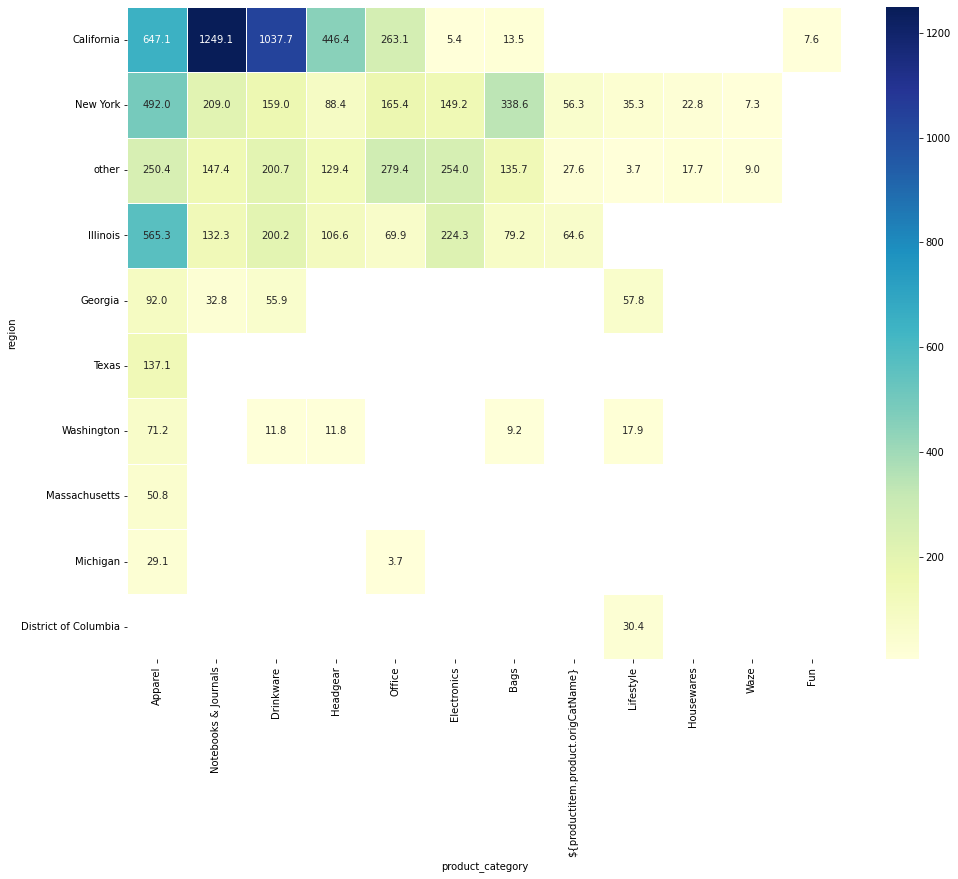

In [7]:
query = """

SELECT 
    product.v2ProductCategory as product_category,
    geoNetwork.region as region  ,
    sum(product.productRevenue/1000000) AS total_revenue
    
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, 
    UNNEST (hits) AS hits,
    UNNEST(hits.product) AS product
    
WHERE 
   hits.transaction.transactionRevenue<>0
   and product.productQuantity > 0 
   
group by product_category,region
order by 2 desc
      

  """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe().replace({'region': {'not available in demo dataset': 'other'}})

result_pivot = pd.pivot_table(result, values='total_revenue', index=['region'],
                    columns=['product_category'], aggfunc=np.sum, fill_value=0, margins=True)
result_pivot=result_pivot.sort_values('All', ascending=False).drop('All', axis=1).sort_values('All', ascending=False, axis=1).sort_values('All', ascending=False, axis=1) .drop('All') 

ax = plt.pyplot.subplots(figsize=(16, 12))
ax=sns.heatmap(result_pivot, linewidths=.5, annot=True, fmt='.1f', cmap="YlGnBu", mask=(result_pivot==0))